# How to work with stock market data on Kaggle

You can find a large number of financial datasets at kaggle.com/datasets.  As of January 2021, [this dataset](https://www.kaggle.com/paultimothymooney/stock-market-data) seems to be the most complete and the most up-to-date.  It contains daily prices and volumes for all stocks listed on NYSE, S&P500, or NASDAQ and it gets updated on a weekly basis.  The data is organized by ticker symbol and it joins nicely with this [supplemental dataset](https://www.kaggle.com/paultimothymooney/stock-market-supplementary-data) that pairs individual ticker symbols with full-length company names (e.g. AAPL => Apple, Inc). For additional stock data, consider using the yfinance Python package (as demonstrated near the bottom of this notebook).  Hopefully this notebook will help you to get started with your own project!


**Modified original copy of this notebook to use FB Prophet**

**Step 1: Import Python Packages**

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
todays_date = datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d")

def plot_stock_data(data,title):
    '''function for plotting stock data'''
    plot = px.line(data, 
                        x="Date", 
                        y=["Close"], 
                        hover_name="Date",
                        line_shape="linear",
                        title=title) 
    return plot

# **Step 2: Load the Stock Market Data into your Kaggle Notebook**

In [2]:
facebook = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/sp500/csv/FB.csv')
apple = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv/AAPL.csv')
netflix = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv/NFLX.csv')
google = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/sp500/csv/GOOG.csv')
microsoft = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv/MSFT.csv')
amazon = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv/AMZN.csv')
nvidia = pd.read_csv('/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv/NVDA.csv')
print('Data from',todays_date)
print('Preview of NFLX.csv:')
netflix.tail(5)

Data from 2021-04-22
Preview of NFLX.csv:


,Date,Low,Open,Volume,High,Close,Adjusted Close
4753,12-04-2021,549.580017,551.049988,2944100,557.979980,552.780029,552.780029
4754,13-04-2021,550.299988,557.000000,2720300,559.750000,553.729980,553.729980
4755,14-04-2021,538.530029,554.869995,3740300,554.869995,540.020020,540.020020
4756,15-04-2021,542.659973,544.169983,3139100,553.489990,549.219971,549.219971
4757,16-04-2021,539.510010,550.539978,3206000,551.979980,546.539978,546.539978


**Step 3: Plot the data**

In [3]:
plot_stock_data(facebook[-30:],'Facebook')

In [4]:
plot_stock_data(apple[-30:],'Apple')

In [5]:
plot_stock_data(netflix[-30:],'Netflix')

In [6]:
plot_stock_data(google[-30:],'Google')

In [7]:
plot_stock_data(microsoft[-30:],'Microsoft')

In [8]:
plot_stock_data(amazon[-30:],'Amazon')

In [9]:
plot_stock_data(nvidia[-30:],'NVIDIA')

# **Step 4: Access additional stock data by using the yfinance Python package**

In [10]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=9cf30dd8aac5b6c1dd96f8301983c6abb412a5b6c6142699dddd000c0b981fe5
  Stored in directory: /root/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=c603991073c84238ef1824c4e48bfac8000d99a17aeeca4691dc1fd8421e3594
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [11]:
import yfinance as yf   
facebook_yf = yf.download('FB','2017-01-01',todays_date) 
facebook_yf['Date'] = facebook_yf.index
apple_yf = yf.download('AAPL','2017-01-01',todays_date) 
apple_yf['Date'] = apple_yf.index
netflix_yf = yf.download('NFLX','2017-01-01',todays_date) 
netflix_yf['Date'] = netflix_yf.index
google_yf = yf.download('GOOG','2017-01-01',todays_date) 
google_yf['Date'] = google_yf.index
amazon_yf = yf.download('AMZN','2017-01-01',todays_date) 
amazon_yf['Date'] = amazon_yf.index
microsoft_yf = yf.download('MSFT','2017-01-01',todays_date) 
microsoft_yf['Date'] = microsoft_yf.index
nvidia_yf = yf.download('NVDA','2017-01-01',todays_date) 
nvidia_yf['Date'] = nvidia_yf.index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
plot_stock_data(facebook_yf,'Facebook')

In [13]:
plot_stock_data(apple_yf,'Apple')

In [14]:
plot_stock_data(netflix_yf,'Netflix')

In [15]:
plot_stock_data(google_yf,'Google')

In [16]:
plot_stock_data(microsoft_yf,'Microsoft')

In [17]:
plot_stock_data(amazon_yf,'Amazon')

In [18]:
plot_stock_data(nvidia_yf,'NVIDIA')

In [19]:
# Prophet
apple_yf.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.459938,115127600,2017-01-03
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.429203,84472400,2017-01-04
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.568691,88774400,2017-01-05
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.876030,127007600,2017-01-06
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.131361,134247600,2017-01-09


In [20]:
apple_y_df=apple_yf[['Date','Volume']]
apple_y_df.columns=['ds', 'y']
apple_y_df.head()

,ds,y
Date,,
2017-01-03,2017-01-03,115127600
2017-01-04,2017-01-04,84472400
2017-01-05,2017-01-05,88774400
2017-01-06,2017-01-06,127007600
2017-01-09,2017-01-09,134247600


In [21]:
from fbprophet import Prophet
m = Prophet()
m.fit(apple_y_df)

In [22]:
apple_future = m.make_future_dataframe(periods=365)
apple_future.tail()

,ds
1442,2022-04-17
1443,2022-04-18
1444,2022-04-19
1445,2022-04-20
1446,2022-04-21


In [23]:
apple_fc = m.predict(apple_future)
apple_fc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1442,2022-04-17,3.530240e+07,-3.028415e+07,1.052528e+08
1443,2022-04-18,3.131261e+07,-3.240627e+07,9.769014e+07
1444,2022-04-19,3.037326e+07,-3.561733e+07,9.580306e+07
1445,2022-04-20,3.132428e+07,-3.958928e+07,9.249647e+07
1446,2022-04-21,3.115672e+07,-3.545420e+07,1.005165e+08


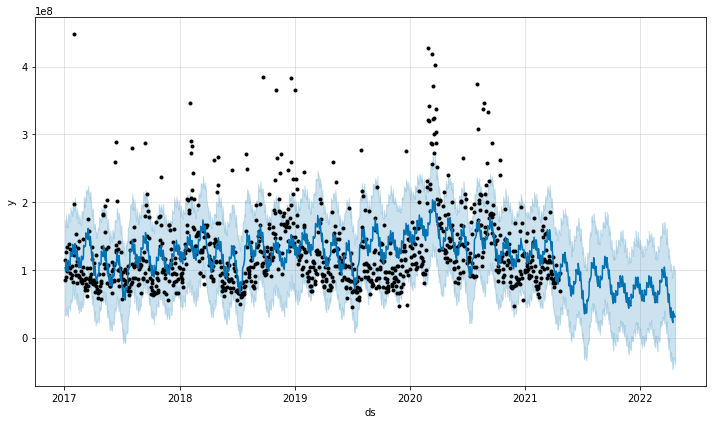

In [24]:
fig1 = m.plot(apple_fc)

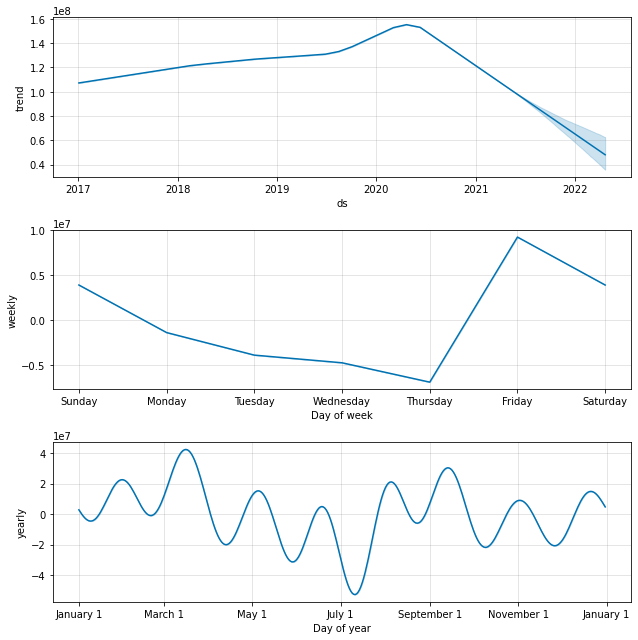

In [25]:
fig2 = m.plot_components(apple_fc)

In [26]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, apple_fc)

In [27]:
plot_components_plotly(m, apple_fc)